### Importação dos dados



In [1]:
!pip install googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40714 sha256=ab0c5e3cb1cb9eeec890c0547abfa7542ec55e9087c71706542e0604ef583255
  Stored in directory: /root/.cache/pip/wheels/f1/09/77/3cc2f5659cbc62341b30f806aca2b25e6a26c351daa5b1f49a
Successfully built googlemaps


In [2]:
!pip install folium

In [3]:
import pandas as pd
import matplotlib as plt
import folium, googlemaps, time
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [4]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [5]:
loja = pd.concat([loja, loja2, loja3, loja4])

In [6]:
loja.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,4.014520,2.927398,-20.534059,-47.171176
std,787.094508,41.973711,1.390518,2.802776,5.399153,4.177887
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,73.610000,4.009423,3.000000,1.000000,-22.250000,-48.790000
50%,295.350000,15.648481,5.000000,1.000000,-22.190000,-48.790000
75%,884.405000,46.591030,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,216.707633,5.000000,24.000000,1.990000,-36.590000


#1. Análise do faturamento


In [7]:
faturamento = pd.DataFrame(loja.groupby('Loja')['Preço'].sum())
faturamento = faturamento.rename(columns={faturamento.columns[0]: "Valor Faturamento"})
faturamento

,Valor Faturamento
Loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


In [8]:
faturamento_t = faturamento.T.copy()
faturamento_t

Loja,Loja 1,Loja 2,Loja 3,Loja 4
Valor Faturamento,1534509.12,1488459.06,1464025.03,1384497.58


<ipython-input-9-4f8003d5c1c8>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2').colors
<ipython-input-9-4f8003d5c1c8>:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


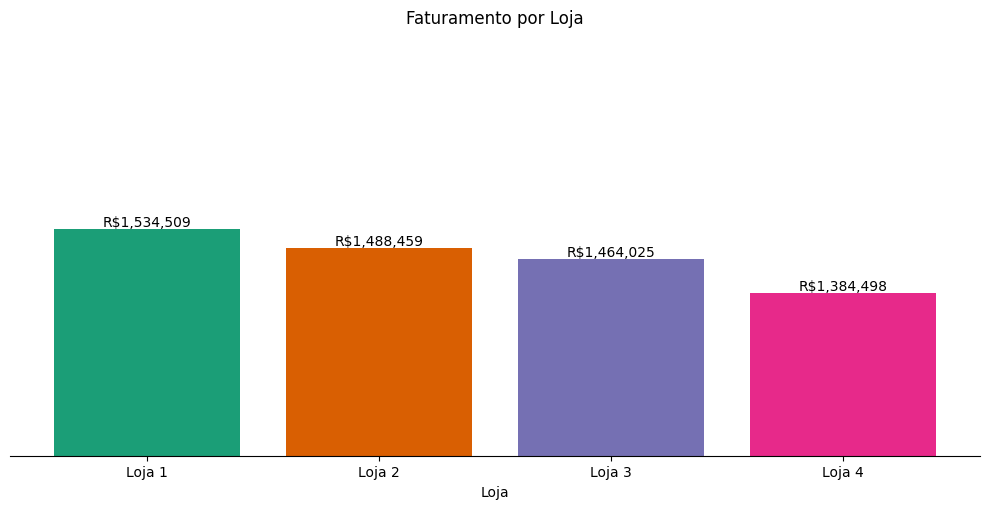

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import pandas as pd  # Importe pandas se ainda não estiver importado


def _plot_bar(loja, valor, color, dinheiro):
    plt.bar(loja, valor, color=color)
    if dinheiro==1:
      plt.text(loja, valor, f'R${valor:,.0f}', ha='center', va='bottom')
    else:
      plt.text(loja, valor, f'{valor:,.2f}', ha='center', va='bottom')

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
colors = plt.cm.get_cmap('Dark2').colors

for i, loja_sel in enumerate(faturamento_t.columns):
    valor_faturamento = faturamento_t[loja_sel].values[0]
    _plot_bar(loja_sel, valor_faturamento, colors[i % len(colors)],1)

# Removendo o eixo y
ax.spines['left'].set_visible(False)
ax.set_yticks([])

ax.set_ylim(1000000, 2000000)  # Define os limites do eixo y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Loja')
plt.title('Faturamento por Loja')
plt.grid(False, axis='y')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


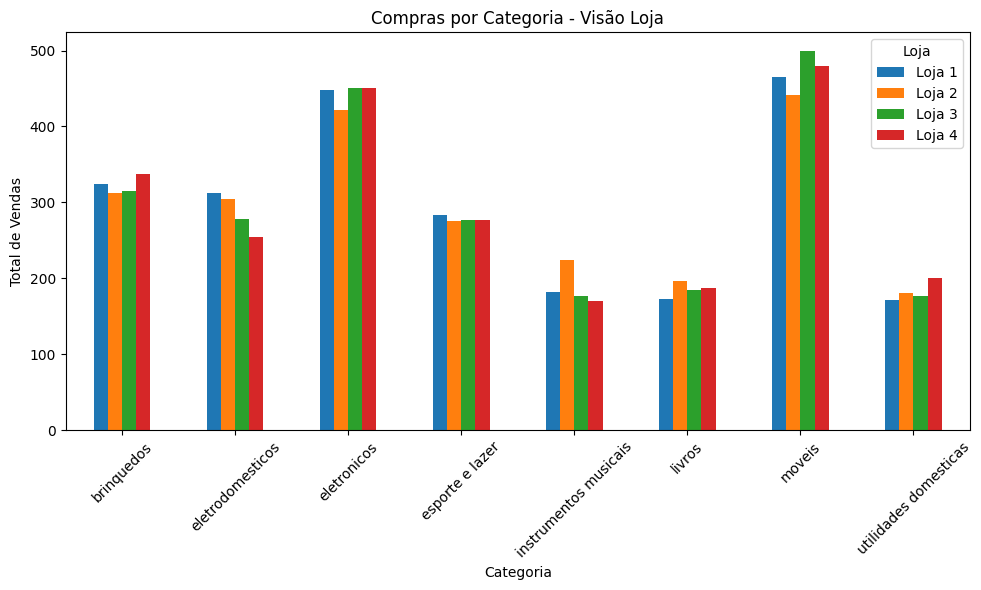

In [10]:

compras_por_categoria = loja.groupby(['Loja', 'Categoria do Produto'])['Produto'].count().reset_index()


compras_pivot = compras_por_categoria.pivot(index='Categoria do Produto', columns='Loja', values='Produto')


print(compras_pivot)


compras_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Compras por Categoria - Visão Loja')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [11]:
media_avaliacoes = pd.DataFrame(loja.groupby(['Loja'])['Avaliação da compra'].mean())
media_t = media_avaliacoes.T.copy()
media_t = round(media_t,2)

<ipython-input-12-957926fbf540>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2').colors
<ipython-input-12-957926fbf540>:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


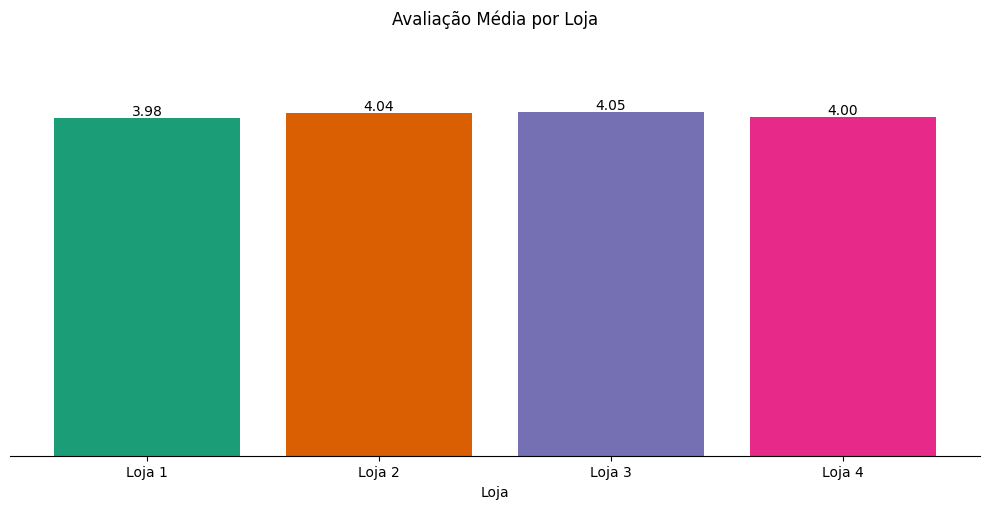

In [12]:

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
colors = plt.cm.get_cmap('Dark2').colors

for i, loja_sel in enumerate(faturamento_t.columns):
    valor_avaliacao = media_t[loja_sel].values[0]
    _plot_bar(loja_sel, valor_avaliacao, colors[i % len(colors)],0)

# Removendo o eixo y
ax.spines['left'].set_visible(False)
ax.set_yticks([])

ax.set_ylim(0, 5)  # Define os limites do eixo y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Loja')
plt.title('Avaliação Média por Loja')
plt.grid(False, axis='y')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()




# 4. Produtos Mais e Menos Vendidos

In [13]:
produto_mais_vendido = loja.groupby(['Loja','Produto'])['Produto'].count().reset_index(name='Quantidade')
max_quantidade = produto_mais_vendido.groupby('Loja')['Quantidade'].max().reset_index()
produtos_max_quantidade = pd.merge(produto_mais_vendido, max_quantidade, on=['Loja', 'Quantidade'])
produtos_max_quantidade[['Loja', 'Produto','Quantidade']]

,Loja,Produto,Quantidade
0,Loja 1,Guarda roupas,60
1,Loja 1,Micro-ondas,60
2,Loja 1,TV Led UHD 4K,60
3,Loja 2,Iniciando em programação,65
4,Loja 3,Kit banquetas,57
5,Loja 4,Cama box,62


In [14]:
produto_menos_vendido = loja.groupby(['Loja','Produto'])['Produto'].count().reset_index(name='Quantidade')
min_quantidades = produto_menos_vendido.groupby('Loja')['Quantidade'].min().reset_index()
produtos_min_quantidade = pd.merge(produto_menos_vendido, min_quantidades, on=['Loja', 'Quantidade'])
produtos_min_quantidade[['Loja', 'Produto','Quantidade']]

,Loja,Produto,Quantidade
0,Loja 1,Celular ABXY,33
1,Loja 1,Headset,33
2,Loja 2,Jogo de tabuleiro,32
3,Loja 3,Blocos de montar,35
4,Loja 4,Guitarra,33


# 5. Frete Médio por Loja


<ipython-input-15-7c1916684c8d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2').colors
<ipython-input-15-7c1916684c8d>:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


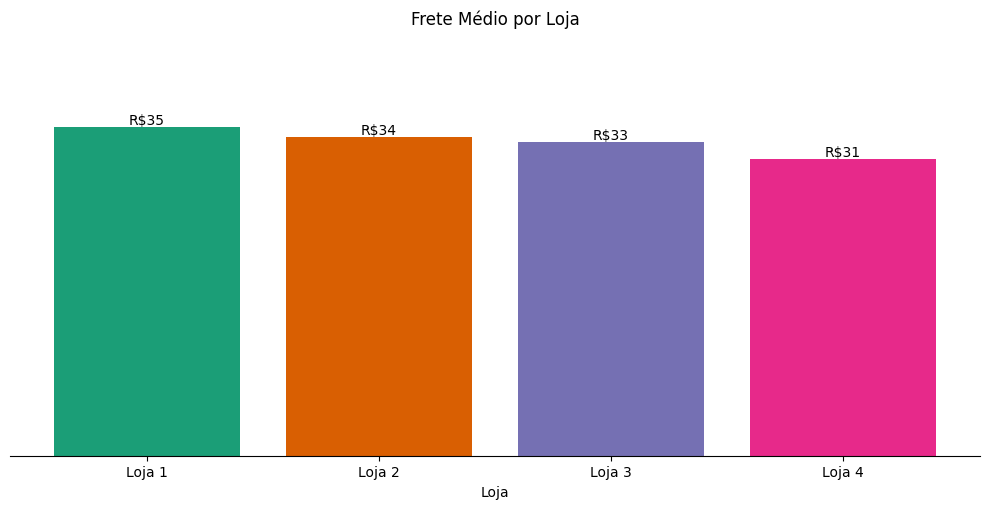

In [15]:

frete_medio = pd.DataFrame(loja.groupby(['Loja'])['Frete'].mean())
frete_medio_t = frete_medio.T.copy()
frete_medio_t = round(frete_medio_t,2)


fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
colors = plt.cm.get_cmap('Dark2').colors

for i, loja_sel in enumerate(frete_medio_t.columns):
    valor_frete = frete_medio_t[loja_sel].values[0]
    _plot_bar(loja_sel, valor_frete, colors[i % len(colors)],1)

# Removendo o eixo y
ax.spines['left'].set_visible(False)
ax.set_yticks([])

ax.set_ylim(0, max(frete_medio_t.values[0]+10))  # Define os limites do eixo y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Loja')
plt.title('Frete Médio por Loja')
plt.grid(False, axis='y')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


In [16]:
'''
Com base nas análises realizadas e nos gráficos gerados, é hora de sintetizar suas descobertas em um relatório final.
Dentro do seu Colab, você deve escrever um texto explicando qual loja o Senhor João deve vender, levando em consideração todos os fatores analisados, como:

O faturamento total das lojas.

As categorias de produtos mais e menos vendidas.

A média das avaliações de clientes por loja.

Os produtos mais e menos vendidos.

O frete médio de cada loja.

Em seu relatório, inclua a justificativa para sua decisão, apoiada nas análises e nas visualizações que você gerou.
Explique, de forma clara e objetiva, os motivos pelos quais uma loja se destaca (ou não) em relação às outras, considerando os pontos fortes e fracos de cada uma.

Seu relatório deve ser bem estruturado, com uma introdução que explique o objetivo da análise, um desenvolvimento com a apresentação dos dados e gráficos,
e uma conclusão recomendando a loja que deve ser vendida e justificando a escolha.

'''

'\nCom base nas análises realizadas e nos gráficos gerados, é hora de sintetizar suas descobertas em um relatório final. \nDentro do seu Colab, você deve escrever um texto explicando qual loja o Senhor João deve vender, levando em consideração todos os fatores analisados, como:\n\nO faturamento total das lojas.\n\nAs categorias de produtos mais e menos vendidas.\n\nA média das avaliações de clientes por loja.\n\nOs produtos mais e menos vendidos.\n\nO frete médio de cada loja.\n\nEm seu relatório, inclua a justificativa para sua decisão, apoiada nas análises e nas visualizações que você gerou. \nExplique, de forma clara e objetiva, os motivos pelos quais uma loja se destaca (ou não) em relação às outras, considerando os pontos fortes e fracos de cada uma.\n\nSeu relatório deve ser bem estruturado, com uma introdução que explique o objetivo da análise, um desenvolvimento com a apresentação dos dados e gráficos, \ne uma conclusão recomendando a loja que deve ser vendida e justificando a 

In [18]:
import folium
import pandas as pd

def meu_mapa_vendas(loja):

  # Calcular a localização central (média das latitudes e longitudes)
  if not loja.empty and 'lat' in loja.columns and 'lon' in loja.columns:
      media_lat = loja['lat'].mean()
      media_lon = loja['lon'].mean()
  else:
      print("O DataFrame 'loja' está vazio ou não possui as colunas 'lat' e 'lon'.")
      exit()

  # Criar o objeto mapa
  meu_mapa = folium.Map(location=[media_lat, media_lon], zoom_start=4)

  # Adicionar marcadores para cada ponto de coordenada no DataFrame
  for index, row in loja.iterrows():
      lat = row['lat']
      lon = row['lon']
      # Você pode adicionar informações adicionais ao marcador ou popup se outras colunas existirem
      # Exemplo com um popup mostrando o índice da linha:
      popup_content = f"Coordenada: ({lat:.4f}, {lon:.4f})"
      folium.Marker([lat, lon], popup=popup_content).add_to(meu_mapa)


  return meu_mapa

meu_mapa_vendas(loja[loja['Loja'] == 'Loja 1'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Obter a lista única de lojas
lojas_unicas = loja['Loja'].unique()

# --- Gerar gráficos de dispersão separados por loja ---
for nome_loja in lojas_unicas:
    loja_filtrada = loja[loja['Loja'] == nome_loja]
    concentracao_compras = loja_filtrada.groupby(['lat', 'lon']).size().reset_index(name='num_compras')
    valor_total_compras = loja_filtrada.groupby(['lat', 'lon'])['Preço'].sum().reset_index(name='valor_total')
    concentracao_compras = pd.merge(concentracao_compras, valor_total_compras, on=['lat', 'lon'])

    plt.figure(figsize=(5, 4))
    scatter_size = plt.scatter(concentracao_compras['lon'], concentracao_compras['lat'],
                               s=concentracao_compras['num_compras'] * 10,
                               alpha=0.6, label='Número de Compras')
    scatter_color = plt.scatter(concentracao_compras['lon'], concentracao_compras['lat'],
                                c=concentracao_compras['valor_total'], cmap='viridis',
                                alpha=0.6, label='Valor Total das Compras')
    plt.colorbar(scatter_color, label='Valor Total das Compras')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Concentração de Compras - {nome_loja}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Gerar mapas de calor separados por loja ---
for nome_loja in lojas_unicas:
    loja_filtrada = loja[loja['Loja'] == nome_loja]
    plt.figure(figsize=(5, 4))
    sns.kdeplot(x=loja_filtrada['lon'], y=loja_filtrada['lat'], weights=loja_filtrada['Preço'],
                cmap="viridis", fill=True, levels=10)
    plt.scatter(loja_filtrada['lon'], loja_filtrada['lat'], s=10, color='black', alpha=0.3, label='Localização das Compras')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Mapa de Calor da Concentração de Compras (Preço) - {nome_loja}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


